Lets' calculate the CEvNS rate from solar neutrinos 

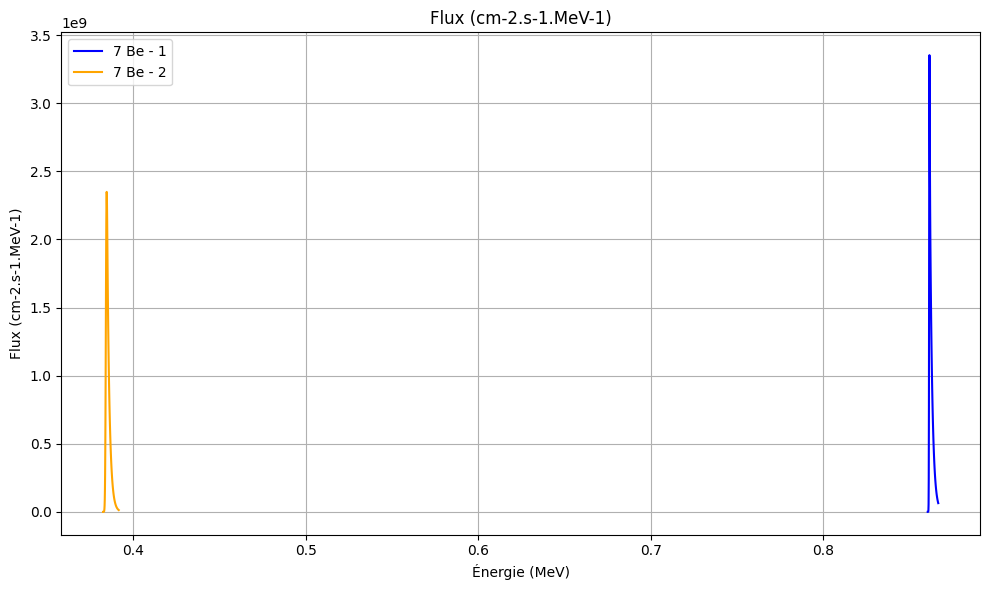

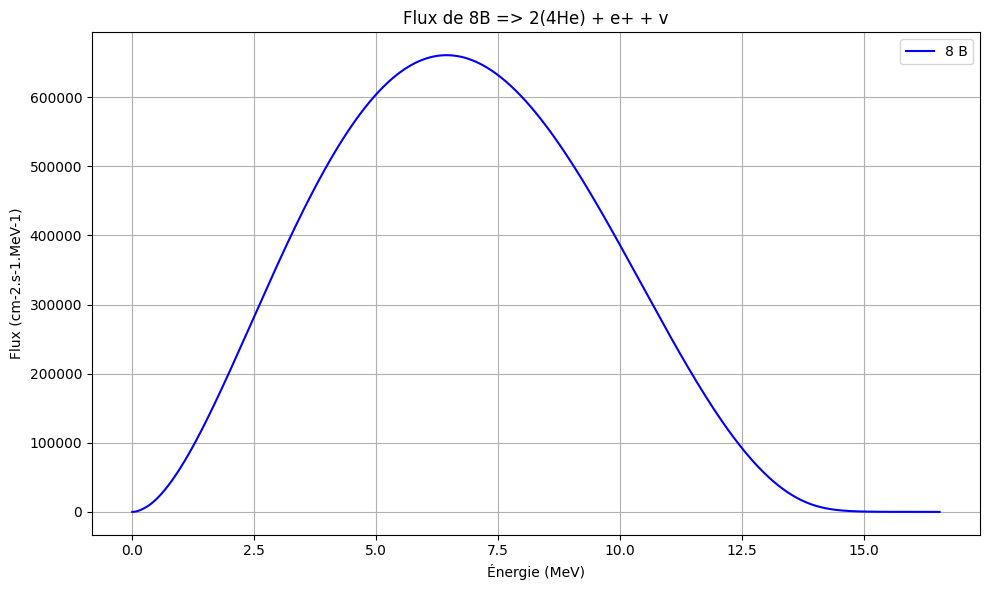

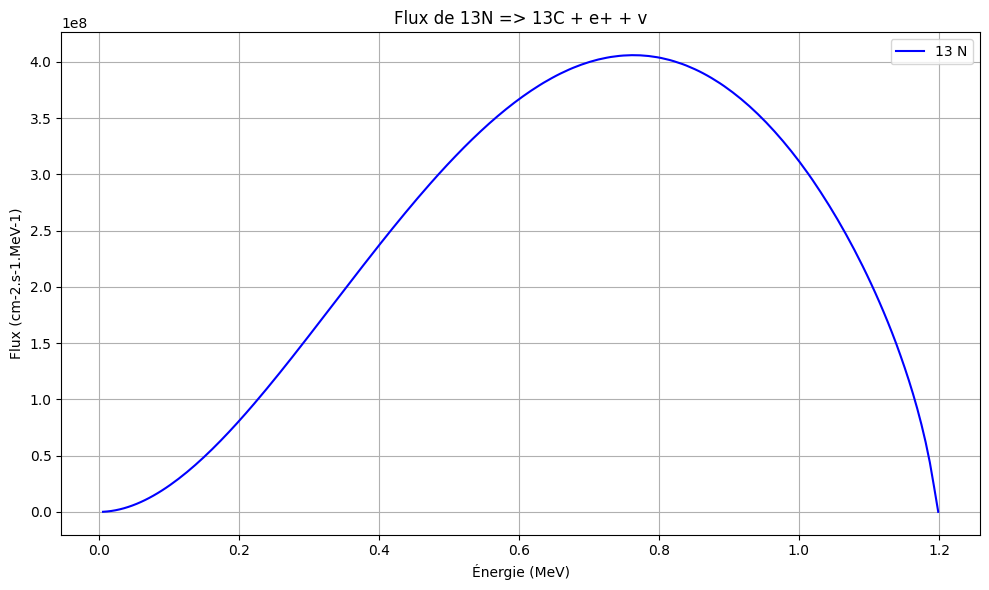

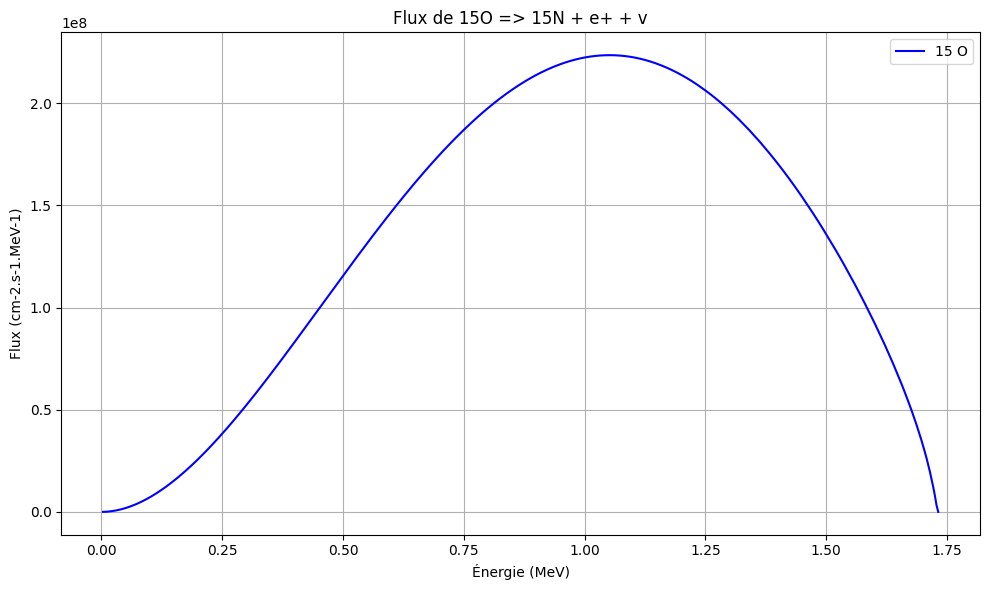

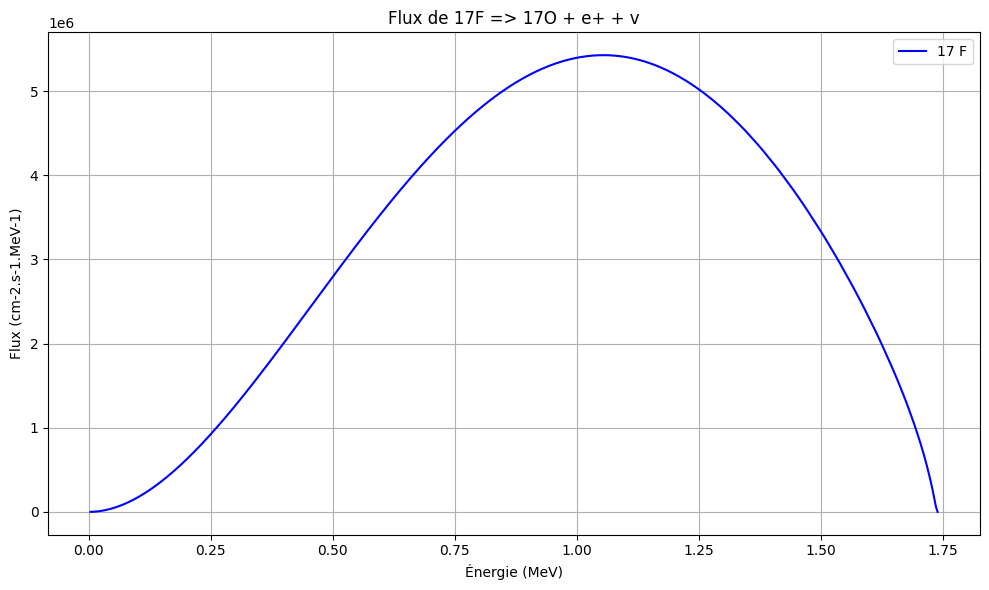

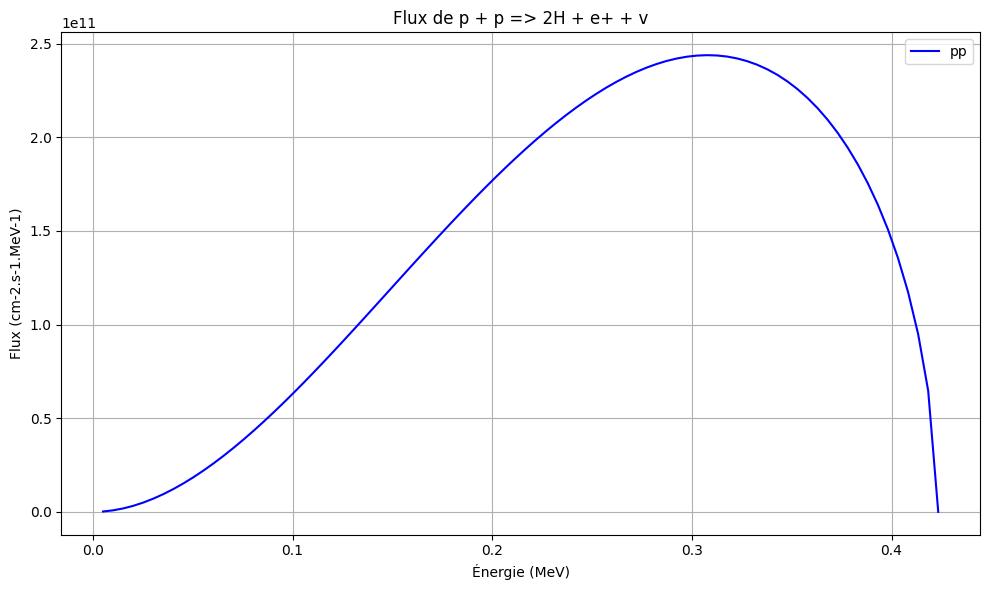

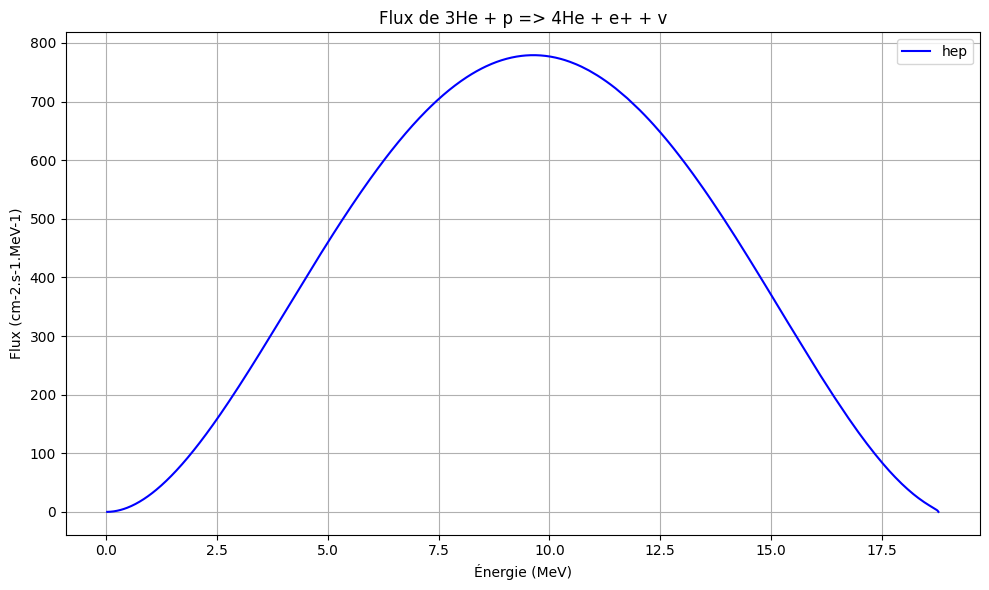

1000


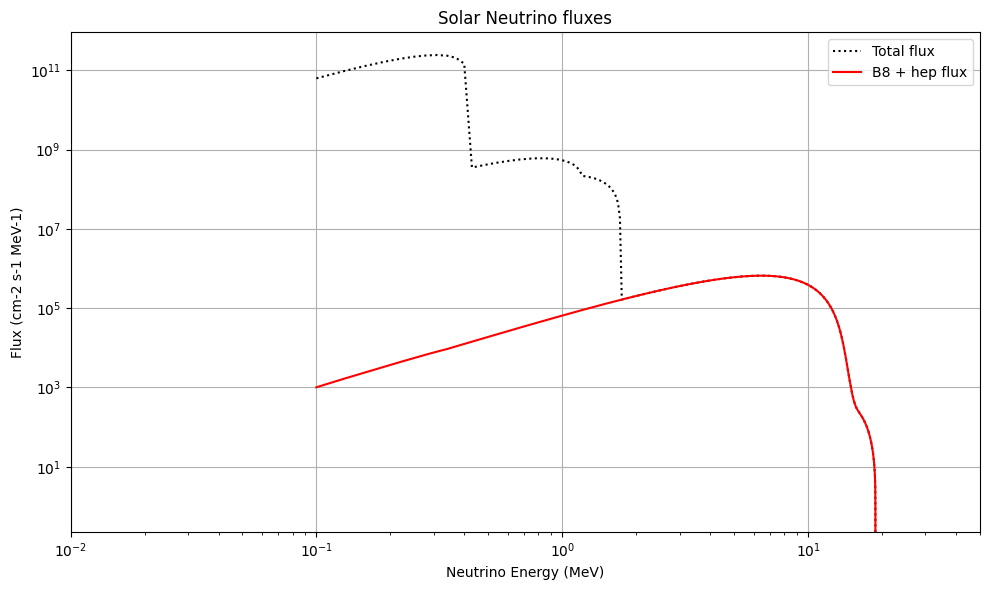

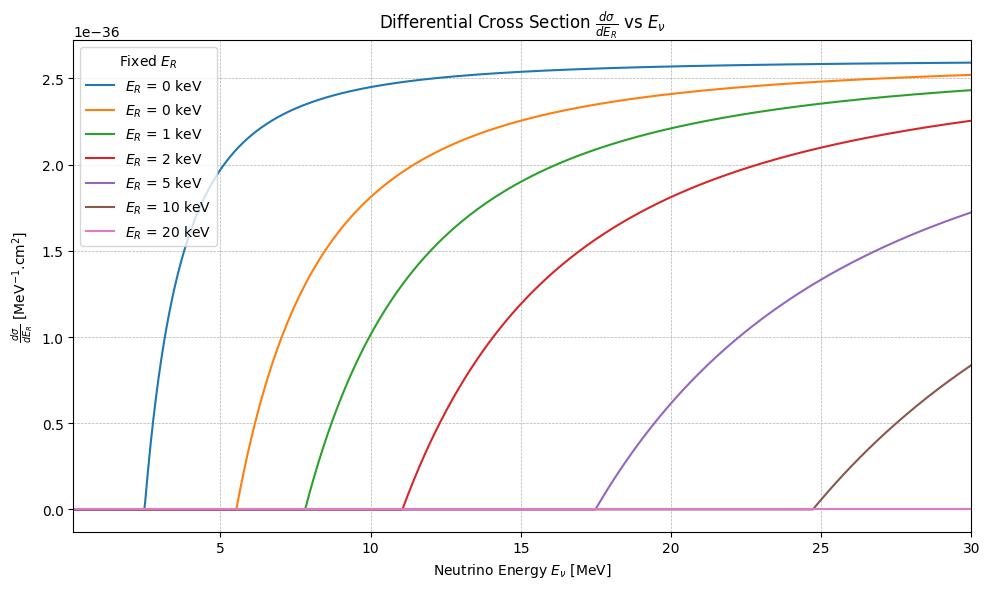

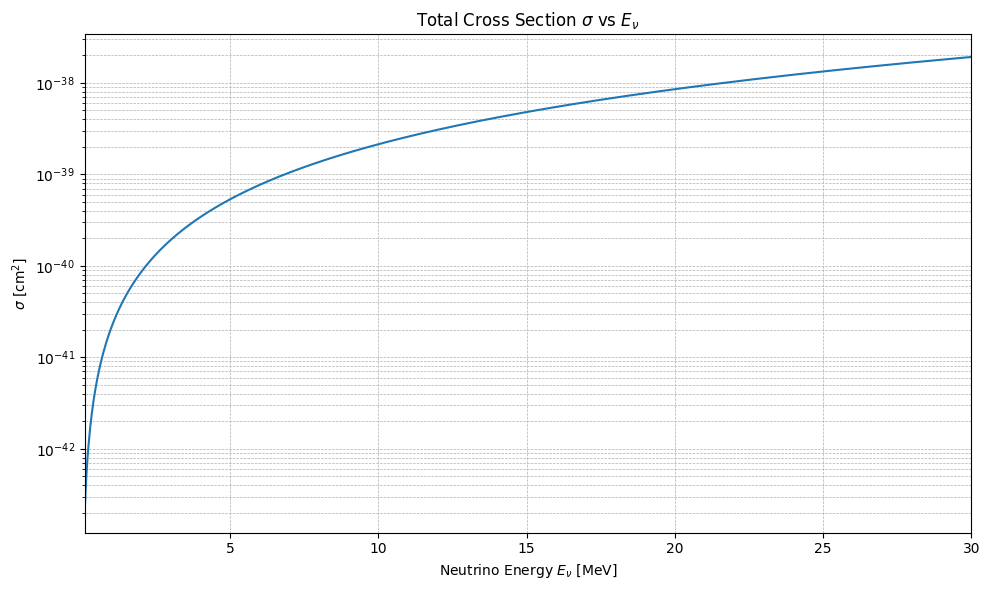

In [58]:
import pandas as pd
import sys
sys.path.append('../week1/')

%run ../week1/SolarNeutrinoFlux.ipynb
%run ../week1/CrossSection.ipynb
from testreadingpickle import lire_spectre_neutrino


Colonnes du DataFrame : Index(['energy_keV', 'spectrum_value_norm'], dtype='object')
0       0.6
1       0.7
2       0.8
3       0.9
4       1.0
       ... 
790    79.6
791    79.7
792    79.8
793    79.9
794    80.0
Name: energy_keV, Length: 795, dtype: float64
0      0.204658
1      0.165342
2      0.133357
3      0.107275
4      0.085989
         ...   
790    0.000000
791    0.000000
792    0.000000
793    0.000000
794    0.000000
Name: spectrum_value_norm, Length: 795, dtype: float64


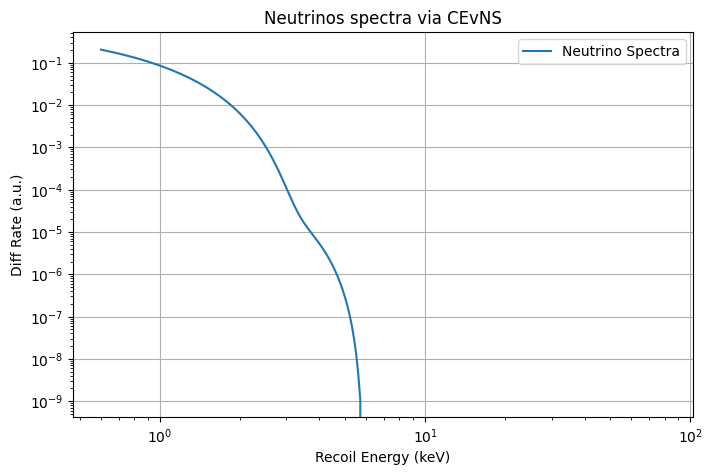

0.08976708110563611
INTEGRAL IS :
21870.911891040814
815.9681571941808


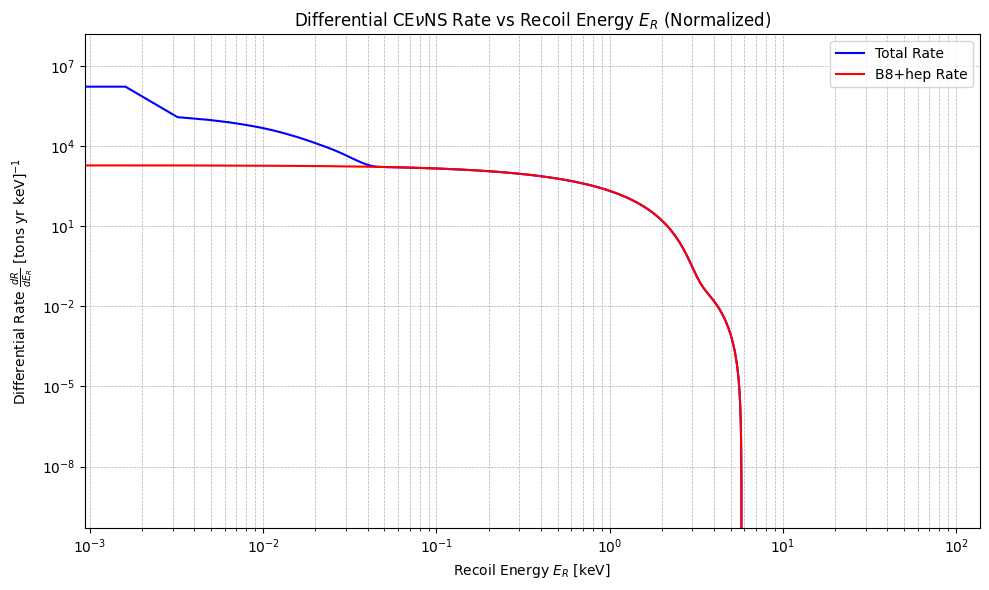

DataFrame sauvegardé au format .pkl


In [59]:
# Constants
N_A = 6.022e23
M_Xe = 131.29  # g/mol
N = N_A / (M_Xe * 1e-6) #tons-1

if __name__ == "__main__":
    fichier = "CEvNS_solar_spectrum.pkl"
    try:
        energies, flux = lire_spectre_neutrino(fichier)
    except Exception as e:
        print(f"Erreur : {e}")


# lists
E_v = np.linspace(0.1, 30, 1000)  # MeV
E_R = np.linspace(0, 80, 50000)  # keV
E_R_MeV = E_R * 1e-3  # E_R in MeV to calculate dsigma

# Computing dR/dER
dRdERtot = []
dRdERB8hep = []

#for i in range(len(E_v)):
    #print(total_fluxB8hep[i] - total_flux[i])

for Er in E_R_MeV:

    Ev_min = np.sqrt(m_A * Er / 2)
    Ev_valid = []
    flux_valid = []
    flux_validB8hep = []

    for i in range(len(E_v)):
        if E_v[i] >= Ev_min:
            Ev_valid.append(E_v[i])
            flux_validB8hep.append(total_fluxB8hep[i])
            flux_valid.append(total_flux[i])

    Ev_valid = np.array(Ev_valid)
    flux_valid = np.array(flux_valid)
    flux_validB8hep = np.array(flux_validB8hep)
    
    dsigmadEr = ((G_F**2 * m_A) / (4 * np.pi)) * Q_V**2 * (1 - (m_A * Er) / (2 * Ev_valid**2))

    integrandtot = flux_valid * dsigmadEr * 3.154e7 #To get years-1
    integrandB8hep = flux_validB8hep * dsigmadEr * 3.154e7 #To get years-1

    #if not np.allclose(integrandtot, integrandB8hep):
        #print(">>> integrands are different!")
        #print("integrandtot[:5] =", integrandtot[:5])
        #print("integrandB8hep[:5] =", integrandB8hep[:5])

    
    ratetot = N * trapezoid(integrandtot, Ev_valid)
    rateB8hep = N * trapezoid(integrandB8hep, Ev_valid)

    dRdERtot.append(ratetot)
    dRdERB8hep.append(rateB8hep)

dRdERtot = np.array(dRdERtot) *1e-3
dRdERB8hep = np.array(dRdERB8hep) *1e-3

Norm = trapezoid(dRdERtot, E_R)
NormB8hep = trapezoid(dRdERB8hep, E_R)

print('INTEGRAL IS :')
print(Norm)
print(NormB8hep)
# Un-normalized
#NormB8hep = 1


diff = dRdERtot-dRdERB8hep

# plotting
plt.figure(figsize=(10, 6))
plt.plot(E_R, dRdERtot, label='Total Rate',color='blue')  # E_R in keV
plt.plot(E_R, dRdERB8hep, label='B8+hep Rate',color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Recoil Energy $E_R$ [keV]")

plt.ylabel(r"Differential Rate $\frac{dR}{dE_R}$ [tons yr keV]$^{-1}$")
plt.title("Differential CE$\u03bd$NS Rate vs Recoil Energy $E_R$ (Normalized)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

interp_fluxflamedisx = interp1d(energies, flux, bounds_error=False, fill_value=0)
interp_fluxB8hep = interp1d(E_R, dRdERB8hep/NormB8hep, bounds_error=False, fill_value=0)

arbitrary_energy = np.linspace(0.7, 6, 1000)

df = pd.DataFrame({
    'rate': dRdERtot,
    'energy(keV)': E_R
})

# Sauvegarde au format .pkl
df.to_pickle('cevns_total_rates.pkl')

print("DataFrame sauvegardé au format .pkl")

And now let's calculate Migdal Rate for those solar neutrinos

In [60]:
P_Migdal = 0.1208049

dR_MigdaldER = P_Migdal*dRdER/Norm

# plotting
plt.figure(figsize=(10, 6))
plt.plot(E_R, dR_MigdaldER, color='blue')  # E_R in keV
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Recoil Energy $E_R$ [keV]")
plt.ylabel(r"Differential Rate $\frac{dR_{Mig}}{dE_R}$ [tons yr keV]$^{-1}$")
plt.title("Differential Rate of Migdal induced by CE$\u03bd$NS vs Recoil Energy $E_R$ (Normalized)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

NameError: name 'dRdER' is not defined